# H1N1 and Seasonal Flu Vaccines Modelling

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> **Problem Statement:** Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity." In [Katsiroumpa A. et al.,(2023)](https://www.mdpi.com/2076-393X/11/2/331) *Predictors of Seasonal Influenza Vaccination Willingness among High-Risk Populations-Three Years after the Onset of the COVID-19 Pandemic*, it was observed that a majority of the participants expressed reluctance or hesitation towards getting vaccinated.

> Vaccine hesitancy is a well-known phenomenon, and the [World Health Organization](https://www.annualreviews.org/doi/full/10.1146/annurev-publhealth-090419-102240) recognizes it as one of the top ten threats to global health. Various factors such as social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission may contribute to vaccine hesitancy. Having comprehensive knowledge of the traits linked to individuals' vaccination behavior can aid in the planning and implementation of future public health initiatives.

> **Main Objective:** The goal of this project is to build a predictive model determining whether people got H1N1 and seasonal flu vaccines using information shared about their backgrounds, opinions, and health behaviors.

### b) Defining the Metric for Success - WIP

The model will be considered a success if the developed predictive model is able to explain 80% of the variation of the target variable and have a an accuracy score of not less that 90%.

### c) Recording the Experimental Design 

1.Data Collection

2.Reading the Data 

3.Checking the Data 

4.External Data Source Validation

5.Data Cleaning

6.Exploratory Data Analysis

7.Data Modelling

8.Implementing the Solution

9.Challenging the Solution 

10.Conclusions and Recommendations

### d) Data Understanding - WIP

*For all binary variables: 0 = No; 1 = Yes.*


| Variable Name | Description |
|:--- |:--- |
|h1n1_vaccine| Whether respondent received H1N1 flu vaccine.|
|seasonal_vaccine| Whether respondent received seasonal flu vaccine.|
|h1n1_concern| Level of concern about the H1N1 flu. **See d(i)**|
|h1n1_concern| Level of concern about the H1N1 flu.**See d(ii)**|
|h1n1_knowledge| Level of knowledge about H1N1 flu.**See d(iii)**|
|behavioral_antiviral_meds| Has taken antiviral medications. (binary)|
|behavioral_avoidance| Has avoided close contact with others with flu-like symptoms. (binary)|
|behavioral_face_mask| Has bought a face mask. (binary)|
|behavioral_wash_hands| Has frequently washed hands or used hand sanitizer. (binary)|
|behavioral_large_gatherings| Has reduced time at large gatherings. (binary)|
|behavioral_outside_home| Has reduced contact with people outside of own household. (binary)|
|behavioral_touch_face| Has avoided touching eyes, nose, or mouth. (binary)|
|doctor_recc_h1n1| H1N1 flu vaccine was recommended by doctor. (binary)|
|doctor_recc_seasonal| Seasonal flu vaccine was recommended by doctor. (binary)|
|chronic_med_condition| Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)|
|child_under_6_months| Has regular close contact with a child under the age of six months. (binary)|
|health_worker| Is a healthcare worker. (binary)|
|health_insurance| Has health insurance. (binary)|
|opinion_h1n1_vacc_effective| Respondent's opinion about H1N1 vaccine effectiveness.**See d(iv)**|
|opinion_h1n1_risk| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.**See d(v)**|
|opinion_h1n1_sick_from_vacc| Respondent's worry of getting sick from taking H1N1 vaccine.**See d(vi)**|
|opinion_seas_vacc_effective| Respondent's opinion about seasonal flu vaccine effectiveness.**See d(vii)**|
|opinion_seas_risk| Respondent's opinion about risk of getting sick with seasonal flu without vaccine.**See d(viii)**|
|opinion_seas_sick_from_vacc| Respondent's worry of getting sick from taking seasonal flu vaccine.**See d(ix)**|
|age_group| Age group of respondent.|
|education| Self-reported education level.|
|race| Race of respondent.|
|sex| Sex of respondent.|
|income_poverty| Household annual income of respondent with respect to 2008 Census poverty thresholds.|
|marital_status| Marital status of respondent.|
|rent_or_own| Housing situation of respondent.|
|employment_status| Employment status of respondent.|
|hhs_geo_region| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.|
|census_msa| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.|
|household_adults| Number of other adults in household, top-coded to 3.|
|household_children| Number of children in household, top-coded to 3.|
|employment_industry| Type of industry respondent is employed in. Values are represented as short random character strings.|
|employment_occupation| Type of occupation of respondent. Values are represented as short random character strings.|

| Key | Likert Rating Scale|
|:--- |:--- |
|**d(i)**| 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.|
|**d(ii)**| 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.|
|**d(iii)**| 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.|
|**d(iv)**| 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.|
|**d(v)**| 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.|
|**d(vi)**| 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.|
|**d(vii)**| 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.|
|**d(viii)**| 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.|
|**d(ix)**'| 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.|

## 2. Reading the Data

In [150]:
# Loading the required libraries 

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency

In [151]:
# Loading the data 

vaccine_df = pd.read_csv("training_set_features.csv")
vaccine_labels = pd.read_csv("training_set_labels.csv")

In [152]:
# Checking the shape of vaccine_df and vaccine_labels

print(vaccine_df.shape)
print(vaccine_labels.shape) 

(26707, 36)
(26707, 3)


Both the data sets contain similar number of rows, that is, 26,707. With this established, the data can easily be merged into one whole data frame containing the target and predictor variables. 

In [153]:
# Merging the two data frames and viewing the combined data frame

combined_df = vaccine_labels.merge(vaccine_df, how='right')
combined_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb




## 3. Checking the Data

In [154]:
# Determining the number of records in our dataset

print (f'The combined_df has {combined_df.shape[0]} rows and {combined_df.shape[1]} columns')

The combined_df has 26707 rows and 38 columns


In [155]:
# Previewing the top of our dataset

combined_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [156]:
# Previewing the bottom of our dataset

combined_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [157]:
# Checking whether each column has an appropriate datatype

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

It can be noted that some columns in combined_df contain null values. This will be tidied under data cleaning before any analysis is done. Additionally, the dataframe has a mix of integer, float, and object data types. The object data types will be encoded into numerical values before any modelling takes place.

In [158]:
# Checking the various statistical measures in the data frame

np.transpose(combined_df.describe())

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
seasonal_vaccine,26707.0,0.465608,0.498825,0.0,0.0,0.0,1.0,1.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0


## 4. External Data Source Validation

In [Katsiroumpa A. et al.,(2023)](https://www.mdpi.com/2076-393X/11/2/331) *Predictors of Seasonal Influenza Vaccination Willingness among High-Risk Populations-Three Years after the Onset of the COVID-19 Pandemic*, it was noted that among participants, 39.4% were willing to accept the seasonal influenza vaccine, 33.9%
were unwilling, and 26.8% were hesitant.

Below, the data set is analysed to establish the percentage uptake of both H1NI and Seasonal Flu vaccines. 

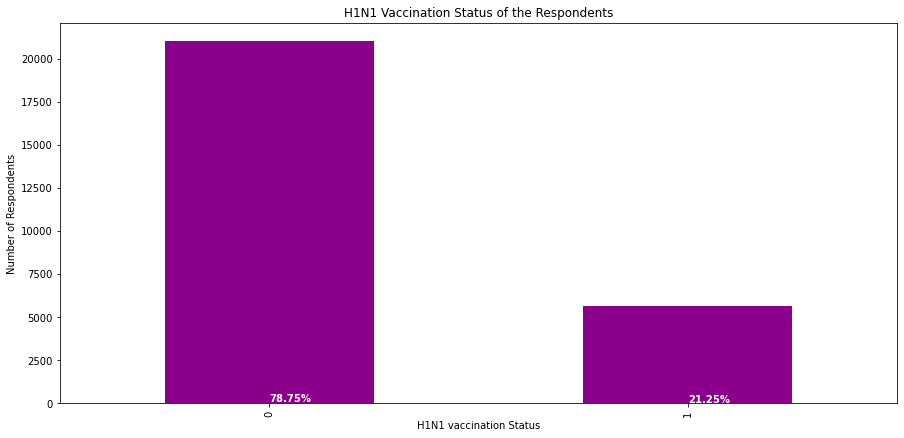

In [159]:
# Convert the h1n1_vaccine column to a pandas series
h1n1_data = pd.Series(combined_df["h1n1_vaccine"])

# Compute the frequency of each value
h1n1_frequency = combined_df["h1n1_vaccine"].value_counts()

# Calculate the proportion of each value in the data set
h1n1_proportion = h1n1_frequency / len(h1n1_data) * 100

# Plot the frequency of the values
ax = h1n1_frequency.plot(kind='bar', figsize =(15, 7), color='darkmagenta')

# Include the percentages to the bar graph
for i, m in enumerate(h1n1_proportion):
    ax.text(i, m + 3, str(np.round(m, 2)) + '%', color='white', fontweight='bold')
    
# Label the plot
plt.title('H1N1 Vaccination Status of the Respondents')
plt.xlabel('H1N1 vaccination Status')
plt.ylabel('Number of Respondents')

# Show the plot
plt.show()


From the plot above, it is observed that 78.75% of the respondents did not receive the H1N1 vaccination. 

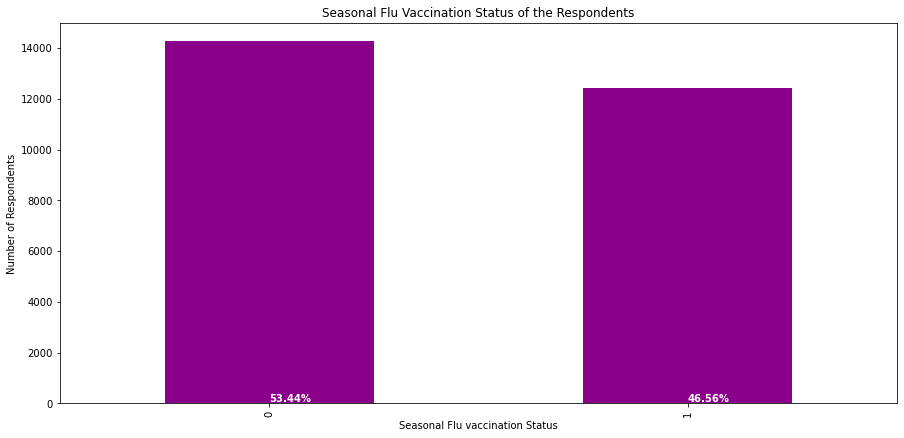

In [160]:
# Convert the seasonal_vaccine column to a pandas series
seasonal_data = pd.Series(combined_df["seasonal_vaccine"])

# Compute the frequency of each value
seasonal_frequency = combined_df["seasonal_vaccine"].value_counts()

# Calculate the proportion of each value in the data set
seasonal_proportion = seasonal_frequency / len(seasonal_data) * 100


# Plot the frequency of the values
ax = seasonal_frequency.plot(kind='bar', figsize =(15, 7), color='darkmagenta')

# Include the percentages to the bar graph
for i, z in enumerate(seasonal_proportion):
    ax.text(i, z + 3, str(np.round(z, 2)) + '%', color='white', fontweight='bold')
    
# Label the plot
plt.title('Seasonal Flu Vaccination Status of the Respondents')
plt.xlabel('Seasonal Flu vaccination Status')
plt.ylabel('Number of Respondents')

# Show the plot
plt.show()


Similarly, the Seasonal Flu Vaccine also showed that 53.44% of respondents were unvaccinated and 46.56% were vaccinated.


The plots align with the results of the research conducted by [Katsiroumpa A. et al.,(2023)](https://www.mdpi.com/2076-393X/11/2/331) on vaccine adoption in the Greek population. It is also worth mentioning that the study took demographic factors into account as possible predictors, which strengthens the data used in this analysis, which includes various demographic characteristics such as gender, age, number of children in the household, etc.





## 5. Tidying the Dataset

### 5.1 Missing Data 

It was noted earlier that there were some features with missing data.

In [161]:
# Identifying the Missing Data
combined_df.isna().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [162]:
# Calculating the percentage of missing values
percent_missing = combined_df.isnull().sum() * 100 / len(combined_df)
percent_missing.sort_values(ascending = False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

The computation shows that 50.44% of the data in the employment_occupation variable is missing, while 49.91% and 45.96% of the data in the employment_industry and health_insurance variables, respectively, are missing. These percentages are too high and no further information regarding the respondents can be found to replace this values. In this case, these variables will be dropped.

Moreover, the data in the income_poverty variable is missing for 16.56% of the respondents. Although this percentage is relatively low compared to the other variables mentioned, it is not possible to fill in the missing data as determining the respondents' income based on the established metrics (i.e., Below Poverty, <= 75,000, Above Poverty, > 75,000) could result in misclassification. This would have a negative effect on the performance of the model. This column will also be dropped. 

In [163]:
# Dropping columns with missing data greater than 10%

combined_df.drop(columns = ['employment_occupation', 'employment_industry',
                            'health_insurance','income_poverty'], inplace = True)
combined_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [164]:
# Review remaining columns with null values 
null_review = pd.DataFrame(combined_df[['doctor_recc_h1n1','doctor_recc_seasonal','rent_or_own','employment_status',
                         'marital_status','education','chronic_med_condition','child_under_6_months',
                         'health_worker','opinion_seas_sick_from_vacc','opinion_seas_risk',
                          'opinion_seas_vacc_effective','opinion_h1n1_sick_from_vacc',
                          'opinion_h1n1_vacc_effective','opinion_h1n1_risk','household_children',
                          'household_adults','behavioral_avoidance','behavioral_touch_face',
                          'h1n1_knowledge', 'h1n1_concern','behavioral_large_gatherings',
                          'behavioral_outside_home','behavioral_antiviral_meds','behavioral_wash_hands',
                          'behavioral_face_mask']])

# Expanding the number of visible columns

pd.set_option('display.max_columns',50)

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

null_review.head()

,doctor_recc_h1n1,doctor_recc_seasonal,rent_or_own,employment_status,marital_status,education,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0.0,0.0,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,NaN,NaN,Own,Employed,Not Married,College Graduate,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,Rent,Not in Labor Force,Not Married,12 Years,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,Own,Employed,Married,Some College,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


From reviewing the null_review data frame above it can be noted that from the 26 columns, 4 contain categorical data while 22 contain numerical data. To deal with the null values, "Missing" shall be used in the categorical data to replace null values while the mode of the different categories will be used in the colums with numerical data. 

In [165]:
# Creating a data frame for the numerical columns

null_numerical = pd.DataFrame(combined_df[['doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition','child_under_6_months',
                         'health_worker','opinion_seas_sick_from_vacc','opinion_seas_risk',
                          'opinion_seas_vacc_effective','opinion_h1n1_sick_from_vacc',
                          'opinion_h1n1_vacc_effective','opinion_h1n1_risk','household_children',
                          'household_adults','behavioral_avoidance','behavioral_touch_face',
                          'h1n1_knowledge', 'h1n1_concern','behavioral_large_gatherings',
                          'behavioral_outside_home','behavioral_antiviral_meds','behavioral_wash_hands',
                          'behavioral_face_mask']])

null_numerical.head()

,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,NaN,NaN,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


In [166]:
# Finding and replacing null values with the mode

numerical_mode = null_numerical.mode().iloc[0]
null_numerical.fillna(numerical_mode, inplace=True)

# Checking that all null values are filled
null_numerical.isna().sum()

doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
household_children             0
household_adults               0
behavioral_avoidance           0
behavioral_touch_face          0
h1n1_knowledge                 0
h1n1_concern                   0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_antiviral_meds      0
behavioral_wash_hands          0
behavioral_face_mask           0
dtype: int64

In [167]:
# Creating a data frame for some of the categorical columns

null_categorical = pd.DataFrame(combined_df[['employment_status',
                         'marital_status','education']])
null_categorical.head()

,employment_status,marital_status,education
0,Not in Labor Force,Not Married,< 12 Years
1,Employed,Not Married,12 Years
2,Employed,Not Married,College Graduate
3,Not in Labor Force,Not Married,12 Years
4,Employed,Married,Some College


In [168]:
# Replacing null categorical values with missing 

null_categorical.fillna(value = 'Missing', inplace = True)
null_categorical.isna().sum()

employment_status    0
marital_status       0
education            0
dtype: int64

It will be noted that column rent_or_own was not included in the categorical data frame. Before filling the null values it would be important to check if a relationship exists between this column and the employment_status of a respondednt. This way, the value used to fill in can be representative to the actual situation. 

In [169]:
# Checking if a correlation exist between rent_or_own and employment_status
# Create a contingency table of the two categorical variables

contingency_table = pd.crosstab(null_categorical['employment_status'], combined_df['rent_or_own'])

print(contingency_table)

# Calculate the chi-squared statistic
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the result
print("Chi-Squared Statistic:", chi2)

print("p-value:", p)

rent_or_own           Own  Rent
employment_status              
Employed            10326  2914
Missing                77    30
Not in Labor Force   7519  2401
Unemployed            814   584
Chi-Squared Statistic: 271.7708239571285
p-value: 1.2774566548493485e-58


From the above, it is noted that the Chi-Squared Statistic is 271.77 and the p-value is 1.27. Since the p-value is grater that 0.05 this indicates that the relationship between the two variables is not statistically significant. From this and the chi-squared test, it can be concluded that there is no strong association between the two categorical variables and one cannot be used to predic the other. With this, the null values of the rent_or_own will be replaced with "Missing" as well. 

In [170]:
# Consolidating the categorical columns

null_categorical = pd.DataFrame(combined_df[['rent_or_own','employment_status',
                         'marital_status','education']])
null_categorical.fillna(value = 'Missing', inplace = True)
null_categorical.isna().sum()

rent_or_own          0
employment_status    0
marital_status       0
education            0
dtype: int64

In [171]:
# Creating a data frame for columns with non-null values

nonnull_pd = pd.DataFrame(combined_df[['respondent_id','seasonal_vaccine','h1n1_vaccine','sex','race',
                                       'census_msa','age_group','hhs_geo_region']])
nonnull_pd.head()

,respondent_id,seasonal_vaccine,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region
0,0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf
1,1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj
2,2,0,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun
3,3,1,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp
4,4,0,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun


In [172]:
# Conctenating the numerical and categorical data frame

complete_df = pd.DataFrame(pd.concat([nonnull_pd, null_categorical, null_numerical], axis=1))
complete_df.head()

,respondent_id,seasonal_vaccine,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,2,0,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun,Own,Employed,Not Married,College Graduate,0.0,0.0,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4,0,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


In [173]:
# Confirming all null values have been cleaned

print(complete_df.isna().sum())

respondent_id                  0
seasonal_vaccine               0
h1n1_vaccine                   0
sex                            0
race                           0
census_msa                     0
age_group                      0
hhs_geo_region                 0
rent_or_own                    0
employment_status              0
marital_status                 0
education                      0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
household_children             0
household_adults               0
behavioral_avoidance           0
behavioral_touch_face          0
h1n1_knowledge                 0
h1n1_concern                   0
behavioral_large_gatherings    0
behavioral

### 5.2 Duplicated Data 

In [174]:
# Check for duplicated rows

complete_df.duplicated().any()

False

In [175]:
# Identifying the Duplicates
duplicated_values = complete_df[complete_df.duplicated(keep = False)]
duplicated_values.shape

(0, 34)

In [176]:
# Drop duplicated row
complete_df.drop_duplicates(inplace = True)

# Confirm that duplicated row has been deleted
complete_df.shape

(26707, 34)

In [177]:
complete_df.head()

,respondent_id,seasonal_vaccine,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_sick_from_vacc,opinion_seas_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,2,0,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun,Own,Employed,Not Married,College Graduate,0.0,0.0,1.0,0.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,1.0,0.0,0.0,1.0,4.0,5.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4,0,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


### 5.3 Target Variable Selection

The data set contains two target variables that is, h1n1_vaccine and seasonal_vaccine. For this model, h1n1_vaccine will be the target variable. In this case, all columns relating to seasonal_vaccine will be dropped as they will not be used in the model development.

In [178]:
# Dropping all columns relating to seasonal_vaccine 

complete_df = complete_df.drop(columns = ['seasonal_vaccine','doctor_recc_seasonal','opinion_seas_vacc_effective',
                                                'opinion_seas_risk','opinion_seas_sick_from_vacc'], inplace = False)
complete_df.shape

(26707, 29)

In [179]:
complete_df.head()

,respondent_id,h1n1_vaccine,sex,race,census_msa,age_group,hhs_geo_region,rent_or_own,employment_status,marital_status,education,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_h1n1_risk,household_children,household_adults,behavioral_avoidance,behavioral_touch_face,h1n1_knowledge,h1n1_concern,behavioral_large_gatherings,behavioral_outside_home,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_face_mask
0,0,0,Female,White,Non-MSA,55 - 64 Years,oxchjgsf,Own,Not in Labor Force,Not Married,< 12 Years,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,0,Male,White,"MSA, Not Principle City",35 - 44 Years,bhuqouqj,Rent,Employed,Not Married,12 Years,0.0,0.0,0.0,0.0,4.0,5.0,4.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0
2,2,0,Male,White,"MSA, Not Principle City",18 - 34 Years,qufhixun,Own,Employed,Not Married,College Graduate,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0,Female,White,"MSA, Principle City",65+ Years,lrircsnp,Rent,Not in Labor Force,Not Married,12 Years,0.0,1.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,4,0,Female,White,"MSA, Not Principle City",45 - 54 Years,qufhixun,Own,Employed,Married,Some College,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0


## 6. Exploratory Data Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
#

In [ ]:
# Data Reduction
#

## 7. Data Modelling

In [ ]:
# Implementing the Solution
# 

## 8. Implementing the Solution

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?